# Implementación y agregación de segmentadores

## 1. Integrantes del grupo

Este trabajo pertenece al Grupo 18 - Equipo 3. Los integrantes somos:
- Irene Fanjul i Penella
- Miguel Jiménez Gomis
- Carles Serra Vendrell
- Adrián Bañuls Arias
- Miriam Pardo Cuesta 

Enlace a Google Colaboratory: https://colab.research.google.com/drive/1IFeAqXkXWiHVyGcndYIHQ9yMCN3bHsnK?usp=sharing#scrollTo=df0Jf5s6ZjeT

## 2. Organización de las reuniones

| Reuniones | Descripción |
|------------|:-----------------------------------------------------------------------------------------------------------------------:|
| 17/12/2020 | Planificación de tareas a realizar. Elección anomalía. | 
| 26/12/2020 | Puesta en común de las posible soluciones investigadas. |
| 03/01/2021 | Elección de la solución que proporciona mejores resultados. Elaboración de la memoria y analisis de las conclusiones. | 

Todos los integrantes del grupo han participado en todas las reuniones.

## 3. Descripción del problema

## 4. Solución propuesta

## 5. Ejecución paso a paso

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from skimage import io, morphology
from skimage.morphology import opening, closing, disk

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker, slic, felzenszwalb
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.filters import sobel
from skimage.segmentation import mark_boundaries
from skimage.color import rgb2gray

Obtención del ground truth

In [238]:
def decode_gt (en_pixel, img_size):
    en_pix[0].split(' ')
    rle = list(map(int, en_pix[0].split(' ')))
    pixel,pixel_count = [],[]
    [pixel.append(rle[i]) if i%2==0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]
    rle_pixels = [list(range(pixel[i],pixel[i]+pixel_count[i])) for i in range(0, len(pixel))]
    rle_mask_pixels = sum(rle_pixels,[]) 
    mask_img = np.zeros((img_size[0]*img_size[1],1), dtype=int)
    mask_img[rle_mask_pixels] = 255
    l,b=cv2.imread('ejemplo_1.jpeg').shape[0], cv2.imread('ejemplo_1.jpeg').shape[1]
    mask = np.reshape(mask_img, (b, l)).T
    plt.imshow(mask)

In [228]:
en_pix = ['308744 1 309511 4 310279 6 311046 9 311814 11 312581 14 313349 16 314116 19 314884 21 315651 24 316419 26 317186 29 317954 31 318721 34 319489 36 320257 38 321026 39 321796 39 322566 39 323336 39 324106 39 324876 39 325646 39 326416 39 327186 39 327956 39 328726 39 329496 39 330266 39 331036 39 331806 39 332576 39 333346 39 334116 36 334886 34 335656 31 336426 29 337196 26 337966 24 338736 21 339506 19 340276 16 341046 14 341816 11 342586 9 343356 6 344126 4 344896 1 283406 2 284174 4 284941 7 285709 9 286476 12 287244 14 288011 17 288779 19 289546 22 290314 24 291081 27 291849 29 292616 32 293384 34 294151 37 294919 39 295686 42 296454 44 297221 47 297989 49 298756 52 299524 54 300291 57 301059 59 301826 63 302594 65 303361 68 304129 70 304897 72 305665 74 306435 74 307205 74 307975 1 307978 71 308748 71 309518 71 310288 71 311058 71 311828 71 312598 71 313368 71 314138 71 314908 71 315678 71 316448 71 317218 71 317988 71 318758 71 319528 71 320298 71 321068 72 321838 72 322608 72 323378 72 324148 72 324918 72 325688 72 326458 72 327228 72 327998 72 328768 72 329538 72 330308 72 331078 72 331848 72 332617 73 333385 75 334156 74 334926 74 335696 74 336466 74 337236 74 338006 74 338776 74 339546 74 340316 72 341086 69 341856 67 342626 64 343396 62 344166 59 344936 57 345706 54 346476 52 347246 49 348016 47 348786 44 349556 42 350326 39 351096 37 351866 34 352636 32 353406 29 354176 27 354946 24 355716 22 356486 19 357256 17 358026 14 358796 12 359566 9 360336 7 361106 4 361876 2 195657 2 196425 5 197192 9 197960 12 198728 15 199495 18 200263 21 201031 24 201798 28 202566 31 203334 34 204101 38 204869 41 205637 44 206404 48 207172 51 207940 53 208708 56 209475 60 210243 63 211011 66 211778 70 212546 73 213314 76 214081 80 214849 83 215617 85 216384 89 217152 92 217920 95 218687 99 219455 102 220223 105 220990 109 221758 112 222528 113 223299 113 224070 112 224841 112 225612 112 226383 112 227153 113 227924 113 228695 113 229466 113 230237 113 231008 113 231779 113 232550 112 233321 112 234092 112 234863 112 235634 112 236405 112 237175 113 237946 113 238717 113 239488 113 240259 113 241030 113 241801 113 242572 113 243343 113 244114 111 244885 108 245656 105 246427 102 247197 100 247968 97 248739 94 249510 90 250281 87 251052 84 251823 80 252594 77 253365 74 254136 70 254907 67 255678 64 256448 61 257219 58 257990 55 258761 51 259532 48 260303 44 261074 41 261845 38 262616 34 263387 31 264158 28 264929 24 265700 21 266470 19 267241 15 268012 12 268783 9 269554 5 270325 2']

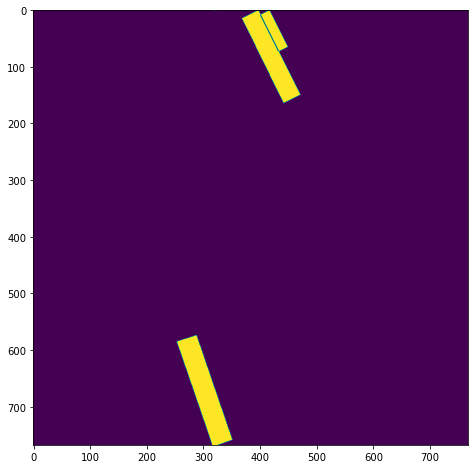

In [240]:
decode_gt(en_pix,img1.shape)

### 5.1. Primera imagen

Lectura de la imagen

(-0.5, 767.5, 767.5, -0.5)

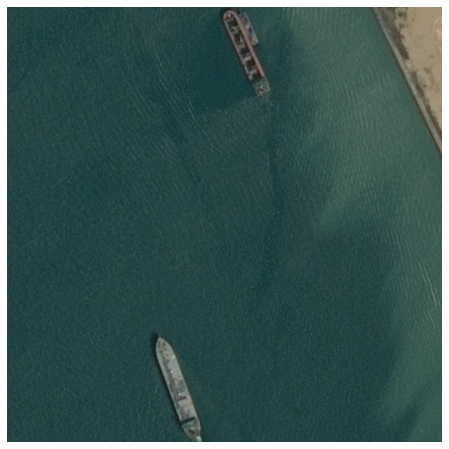

In [263]:
# Se carga la imagen que se quiere corregir
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
img1 = cv2.imread('ejemplo_1.jpeg', 1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
# Para que no aparezcan los números en los ejes
plt.axis('off')

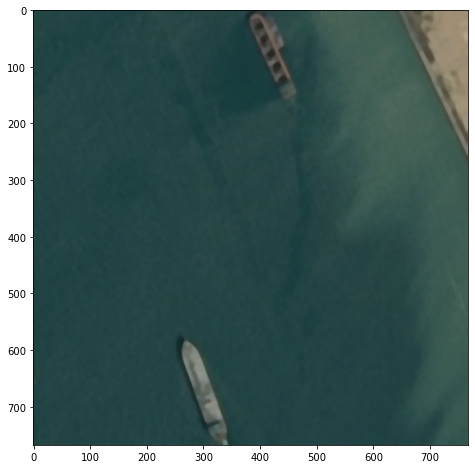

In [265]:
# Suavizado previo para eliminar el ruido de la imagen
gray = cv2.medianBlur(np.array(img1, dtype = 'uint8'), 9)
plt.imshow(gray)

### Segmentador SLIC

Lo aplico sobre la imagen ya suavizada

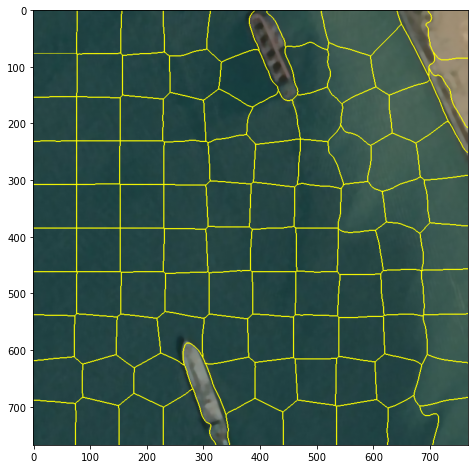

In [266]:
segments_slic = slic(gray, n_segments=100, compactness=10, sigma=5)
plt.imshow(mark_boundaries(gray, segments_slic))

Detecta correctamente los barcos pero sería necesario fusionar todas las segmentaciones pertenecientes al mar.

Se pinta la imagen utilizando los segmentos encontrados

In [268]:
import skimage.color as color

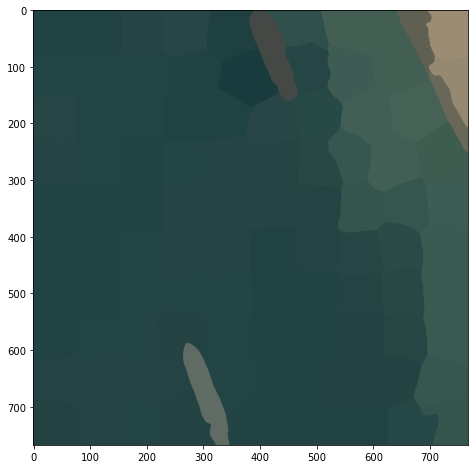

In [269]:
plt.imshow(color.label2rgb(segments_slic, gray, kind='avg'));

### Segmentador felzenszwalb

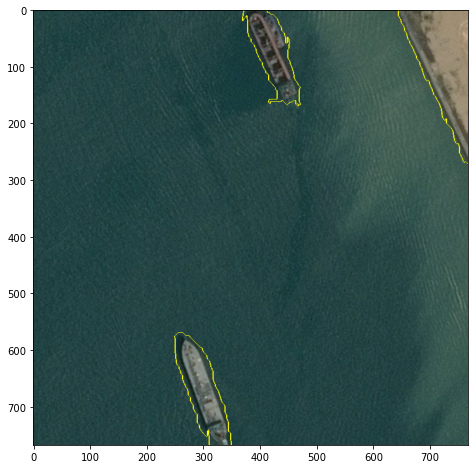

In [270]:
segments_fz = felzenszwalb(img1, scale=400, sigma=4, min_size=400)
plt.imshow(mark_boundaries(img1, segments_fz))

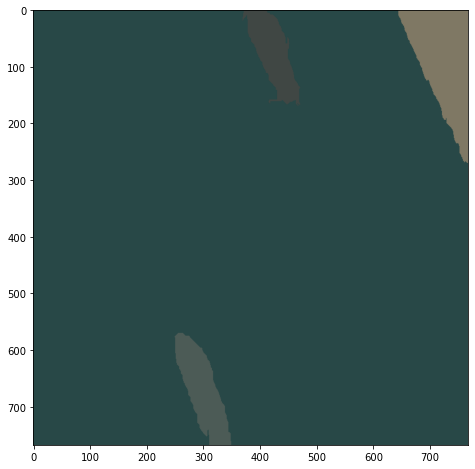

In [272]:
image_felzenszwalb_colored = color.label2rgb(segments_fz, img1, kind='avg')
plt.imshow(image_felzenszwalb_colored);

### Segmentador watershed

He encontrado esta implementación en Internet, pero no consigo que los resultados sean buenos.

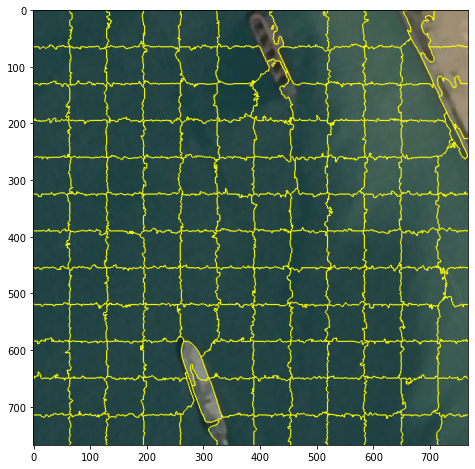

In [278]:
gradient = sobel(rgb2gray(gray))
segments_watershed = watershed(gradient, markers=140, compactness=0.0002)
plt.imshow(mark_boundaries(gray, segments_watershed))

### 5.2. Segunda imagen

(-0.5, 767.5, 767.5, -0.5)

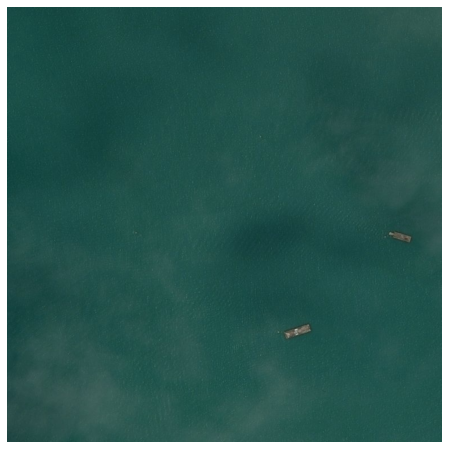

In [273]:
# Se carga la imagen que se quiere corregir
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
img2 = cv2.imread('ejemplo_2.jpeg', 1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
# Para que no aparezcan los números en los ejes
plt.axis('off')

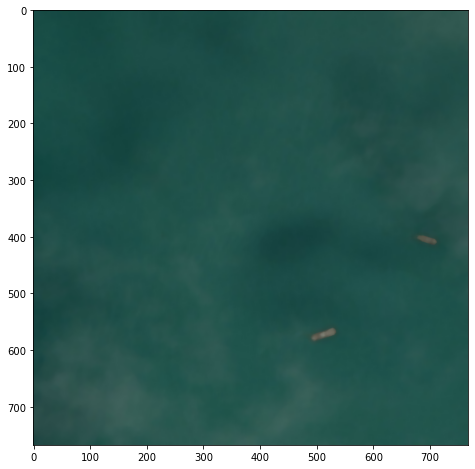

In [274]:
# Suavizado previo para eliminar el ruido de la imagen
gray2 = cv2.medianBlur(np.array(img2, dtype = 'uint8'), 9)
plt.imshow(gray2)

### Segmentador SLIC

He introducido la imagen sin suavizar, ya que así se delimitan mejor los barcos

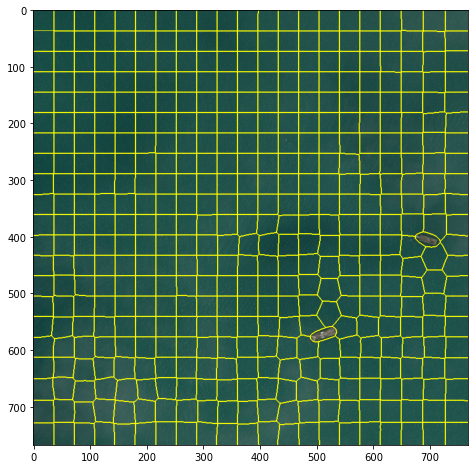

In [275]:
segments_slic2 = slic(img2, n_segments=450, compactness=10, sigma=5)
plt.imshow(mark_boundaries(img2, segments_slic2))

### Segmentador felzenszwalb

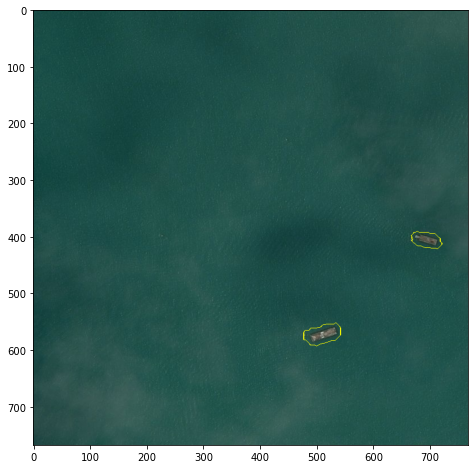

In [276]:
segments_fz = felzenszwalb(img2, scale=400, sigma=4, min_size=400)
plt.imshow(mark_boundaries(img2, segments_fz))

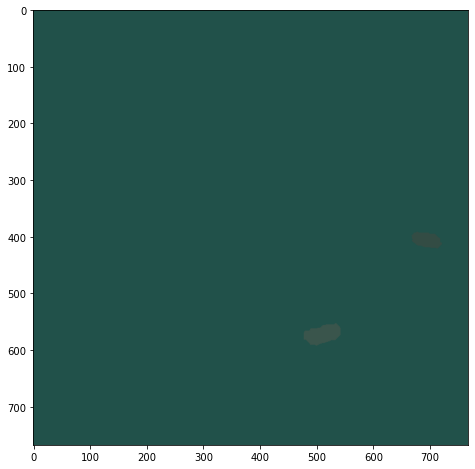

In [277]:
image_felzenszwalb_colored = color.label2rgb(segments_fz, img2, kind='avg')
plt.imshow(image_felzenszwalb_colored);

También he probado a umbralizar localmente la imagen y da buenos resultados, aunque no creo que valga como segmentador.

(-0.5, 767.5, 767.5, -0.5)

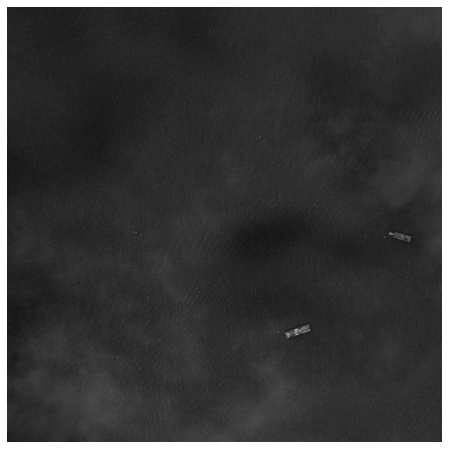

In [283]:
# Se carga la imagen que se quiere corregir
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
img2_g = cv2.imread('ejemplo_2.jpeg', 0)
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img2_g, cmap='gray')
# Para que no aparezcan los números en los ejes
plt.axis('off')

In [162]:
def umbralizacion_local (img, blk_size, const):
    """Esta función toma como argumentos la imagen a la que aplicar la umbralización local y
    los parámetros blk_size y const.
    img -- Imagen a procesar
    blk_size -- Tamaño del área sobre el que va a tener efecto la umbralización.
    const -- Constante que se resta a la media calculada.
    """
    # Suavizado previo para eliminar el ruido de la imagen
    gray = cv2.medianBlur(np.array(img, dtype = 'uint8'), 7)

    # Aplicación de la función 'adaptiveThreshold' para llevar acabo la umbralización local mediante el método gaussiano
    bn_local = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, const)
    return bn_local

In [152]:
def plot_umb_local (img, lista_blk_size):
    for i in range(len(lista_blk_size)):
        bn_local = umbralizacion_local (img, lista_blk_size[i], 3)
        plt.subplot(len(lista_blk_size)//3,3+len(lista_blk_size)%3, (i+1))
        plt.title('Umbral local BS=' + str(lista_blk_size[i]))
        plt.imshow(bn_local, cmap='gray')
        plt.axis('off')

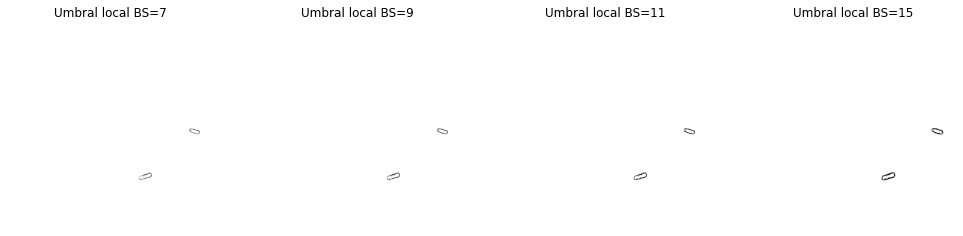

In [284]:
# Selección del tamaño de las figuras 
matplotlib.rcParams['figure.figsize'] = (17.0, 15.0)

# Creamos una lista con los posibles tamaño de área que se van a probar como parámetro
# para la umbralización local.
lista_blk_size = [7, 9, 11, 15]
plot_umb_local (img2_g, lista_blk_size)

(-0.5, 767.5, 767.5, -0.5)

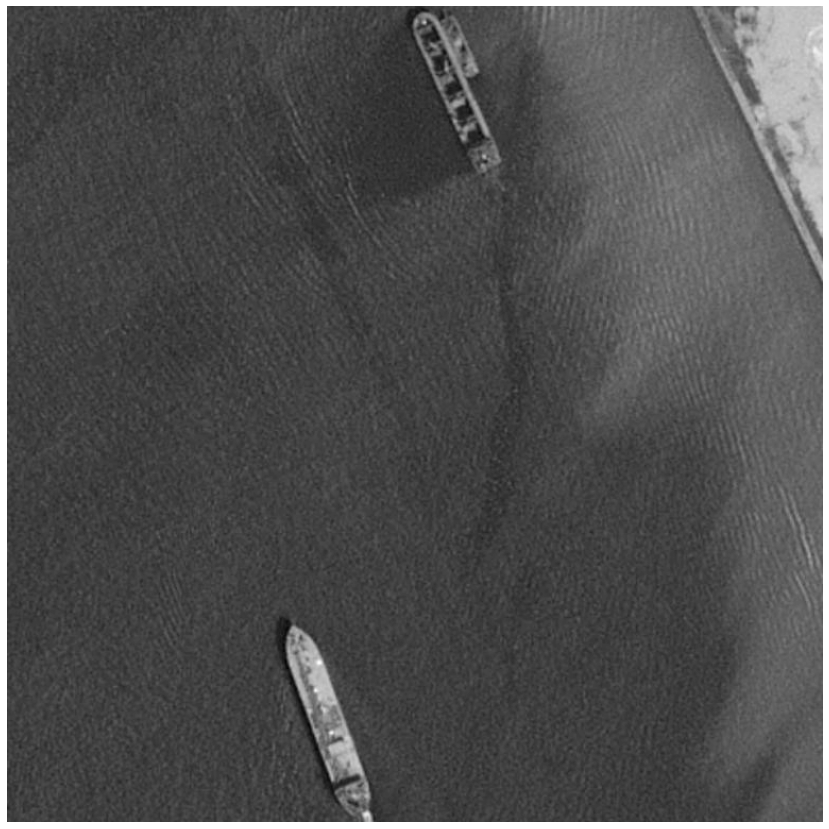

In [285]:
img1_g = cv2.imread('ejemplo_1.jpeg', 0)
plt.imshow(img1_g,cmap='gray')
plt.axis('off')

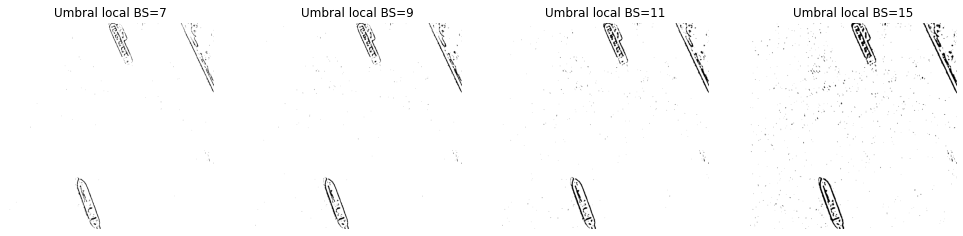

In [286]:
# Selección del tamaño de las figuras 
matplotlib.rcParams['figure.figsize'] = (17.0, 15.0)

# Creamos una lista con los posibles tamaño de área que se van a probar como parámetro
# para la umbralización local.
lista_blk_size = [7, 9, 11, 15]
plot_umb_local (img1_g, lista_blk_size)

## Pruebas varias que no dieron resultado

(-0.5, 767.5, 767.5, -0.5)

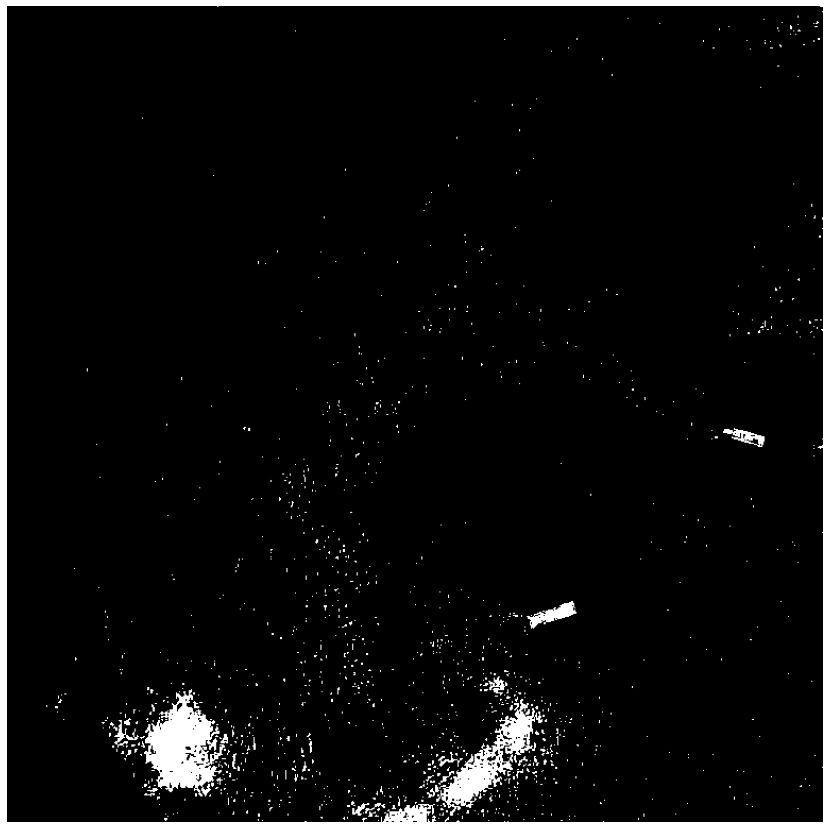

In [156]:
img2_g = cv2.imread('ejemplo_2.jpeg', 0)
#img1_g = cv2.medianBlur(np.array(img1_g, dtype = 'uint8'), 7)
ret, thresh = cv2.threshold(img2_g, 80, 255, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.axis('off')

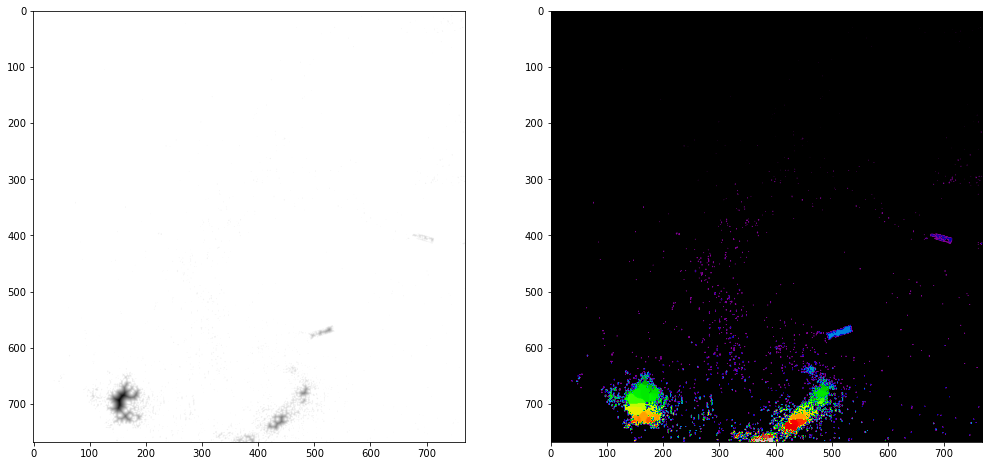

In [151]:
from scipy import ndimage as ndi
distance = ndi.distance_transform_edt(thresh)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=thresh)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=thresh)

plt.subplot(1,2,1)
plt.imshow(-distance, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(labels, cmap=plt.cm.nipy_spectral)

## 6. Conclusiones

## 7. Bibliografía

In [6]:
%%html
<a id='bib'></a>
<i>[1] 03/01/2021, Packt, https://subscription.packtpub.com/book/application_development/9781785283932/2/ch02lvl1sec25/creating-a-vignette-filter </i>